In [1]:
#Add repo path to the system path
from pathlib import Path
import os, sys
repo_path= Path.cwd().resolve()
while '.gitignore' not in os.listdir(repo_path): # while not in the root of the repo
    repo_path = repo_path.parent #go up one level
sys.path.insert(0,str(repo_path)) if str(repo_path) not in sys.path else None
exp_path = Path.cwd().resolve() # experiment path

In [2]:
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

From all the finding, we will make use only from the masses and calcifications. The other findings are not relevant for now...

finding_categories
['Mass']                                1123
['Suspicious Calcification']             402
['Suspicious Calcification', 'Mass']      82
Name: count, dtype: int64

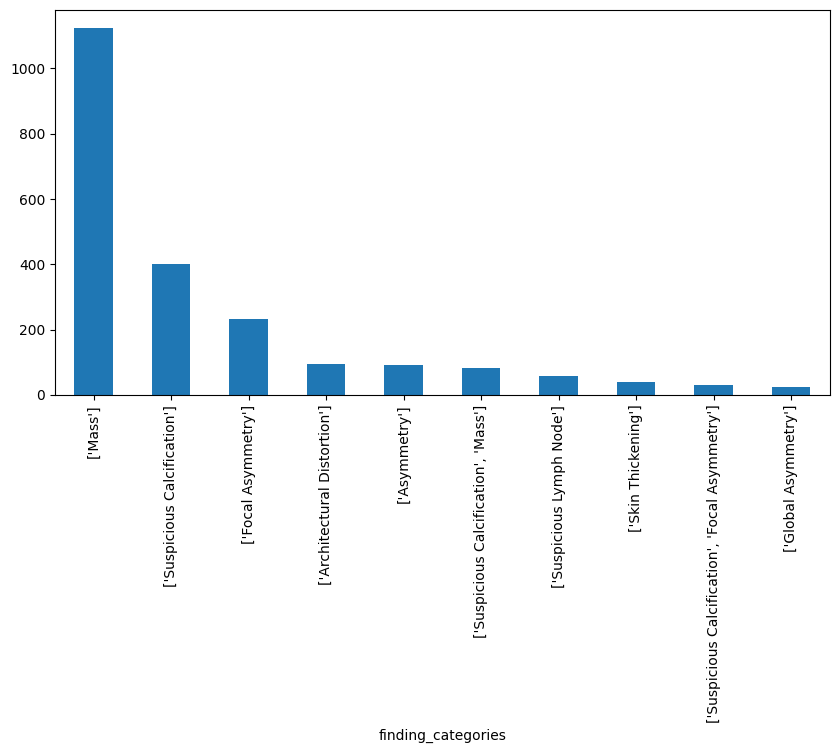

In [16]:
# read metadata file
metadata_path = repo_path / 'data/vindr-mammo/metadata'/f'finding_annotations.csv' 
metadata = pd.read_csv(metadata_path)

# keep only cases with ['Suspicious Calcification', 'Mass'] and ['Mass'] in finding_category
metadata = metadata[metadata['finding_categories']!= "['No Finding']"] # only with lesions
# show cases as plot in the column 'finding_categories', show only first 10 values
metadata['finding_categories'].value_counts()[:10].plot(kind='bar', figsize=(10,5))

categories_touse = ["['Mass']", "['Suspicious Calcification']", "['Suspicious Calcification', 'Mass']"]
metadata = metadata[metadata['finding_categories'].isin(categories_touse)]
metadata.finding_categories.value_counts()

Original coordinates: [ 359 1379  418 1476]
Laterality: L


Text(0.5, 1.0, "The category is ['Suspicious Calcification']")

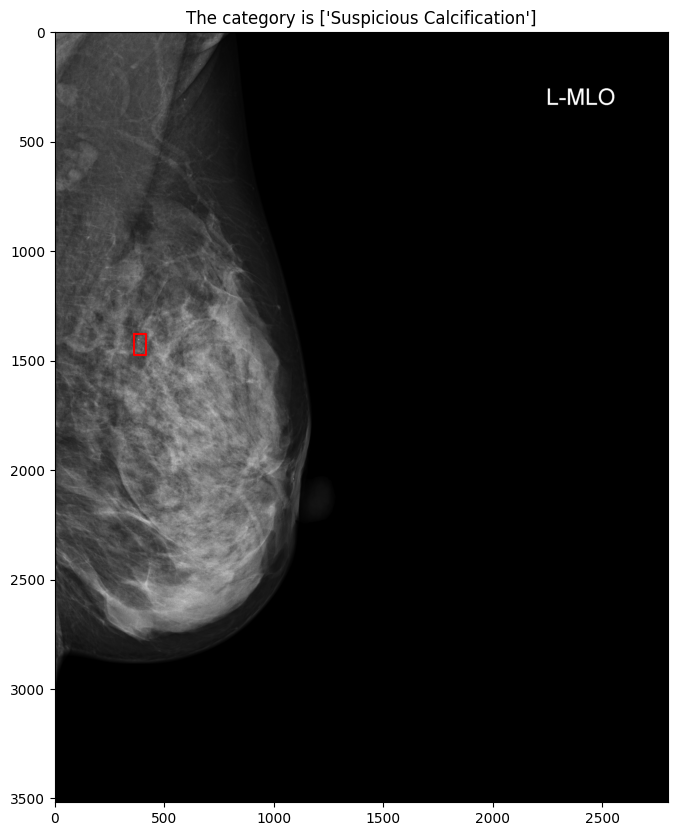

In [115]:
folder_name = 'siemens15k'
i = 88
# get bbox
x1, y1, x2, y2 = metadata.xmin.iloc[i], metadata.ymin.iloc[i], metadata.xmax.iloc[i], metadata.ymax.iloc[i]
coord = np.asarray([x1, y1, x2, y2], dtype=int)
print(f'Original coordinates: {coord}')
# get laterality
side = metadata.laterality.iloc[i]
print(f'Laterality: {side}')

# add png extension
file_name = metadata.image_id.iloc[i] + '.png'
image_path = repo_path / 'data/vindr-mammo/images/' f'{folder_name}' / file_name
# read images
im = np.asarray(Image.open(image_path))

original_size = im.shape

# if side is right, flip x coordinate
if side == 'R':
    coord[0] =  original_size[1] - coord[0]# -1
    coord[2] =  original_size[1] - coord[2]# -1
    
    print(f'Flipped coordinates: {coord}')

    # plot original and preprocessed
plt.figure(figsize=(10,10))
plt.imshow(im, cmap='gray')
# plot the bbox
plt.plot([coord[0], coord[0], coord[2], coord[2], coord[0]], [coord[1], coord[3], coord[3], coord[1], coord[1]], color='r')
plt.title(f'The category is {category}')

# Prompt saving

In [17]:
# metadata folder
metadata_path = repo_path  /'data/vindr-mammo/metadata' / 'finding_annotations.csv'
metadata = pd.read_csv(metadata_path, header=0)
# filter to images with no findings
metadata = metadata[metadata['finding_categories'] == "['No Finding']"]
metadata

,study_id,series_id,image_id,laterality,view_position,height,width,breast_birads,breast_density,finding_categories,finding_birads,xmin,ymin,xmax,ymax,split
2254,b8d273e8601f348d3664778dae0e7e0b,b36517b9cbbcfd286a7ae04f643af97a,d8125545210c08e1b1793a5af6458ee2,L,CC,3518,2800,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training
2255,b8d273e8601f348d3664778dae0e7e0b,b36517b9cbbcfd286a7ae04f643af97a,290c658f4e75a3f83ec78a847414297c,L,MLO,3518,2800,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training
2256,b8d273e8601f348d3664778dae0e7e0b,b36517b9cbbcfd286a7ae04f643af97a,cd0fc7bc53ac632a11643ac4cc91002a,R,CC,3518,2800,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training
2257,b8d273e8601f348d3664778dae0e7e0b,b36517b9cbbcfd286a7ae04f643af97a,71638b1e853799f227492bfb08a01491,R,MLO,3518,2800,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training
2258,8269f5971eaca3e5d3772d1796e6bd7a,d931832a0815df082c085b6e09d20aac,dd9ce3288c0773e006a294188aadba8e,L,CC,3518,2800,BI-RADS 1,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20481,f2093a752e6b44df5990f5fd38c99dd2,2b1b2b8f48abab9819c0b3d091e152ee,ea732154d149f619b20070b78060ae65,R,CC,2812,2012,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training
20482,b3c8969cd2accfa4dbb2aece1f7158ab,69d7f07ea04572dad5e5aa62fbcfc4b7,4689616c3d0b46fcba7a771107730791,R,CC,3580,2702,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training
20483,b3c8969cd2accfa4dbb2aece1f7158ab,69d7f07ea04572dad5e5aa62fbcfc4b7,3c22491bcf1d0b004715c28d80981cdd,L,CC,3580,2702,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training
20484,b3c8969cd2accfa4dbb2aece1f7158ab,69d7f07ea04572dad5e5aa62fbcfc4b7,d443b9725e331b8b27589aa725597801,R,MLO,3580,2686,BI-RADS 2,DENSITY C,['No Finding'],NaN,NaN,NaN,NaN,NaN,training


In [18]:
# the number of files in a dir
dir_path = repo_path / 'data/vindr-mammo/images/siemens15k_RGB_wMass'
len(os.listdir(dir_path))

809